# On Eigendecomposition of Asset Returns
### Francisco A. Ibanez

## Part 1. $\Sigma$ v. $R$
To test some of the outstanding points on the stability of the eigendecomposition of asset returns, we will analyze simulated returns to avoid drawing conclusions from a specific dataset, which might not serve the general case. Because the eigendocmposition of a 2-by-2 covariance matrix is trivial, we need to work with at least the three-assets case.

Let's assume a market where the asset price dynamics can be described by the following stochastic differential equation:

\begin{align}
d P_{t} &= \mu_{i} P_{t} dt + \sigma P_{t} dW_{t} \\
\end{align}

where $P_{i,t}$ is the price of asset $i$ at time $t$, $\mu$ and $\sigma$ are the mean and standard deviation of the asset's returns and $W_{t}$ is a Wiener process with Gaussian increments. Using the Cholesky decomposition, the previous equation can be expanded to a two-asset framework with prices $S_{1}$ and $S_{2}$ with non-zero correlation $\rho$ as follows: 

\begin{align}
d S_{1,t} &= \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t} \\
d S_{2, t} &= \mu_{2} S_{2, t} dt + \sigma_{2} S_{2, t} \rho dW_{t} + \sigma_{2} S_{2, t} \sqrt{1 - \rho^{2}} dZ_{t}
\end{align}

We can generalize the system above for the case with multiple assets, by summarizing their interaction in the correlation matrix $R$: 

\begin{align}
R = \begin{bmatrix} 1 & \rho_{1, 2} & \cdots & \rho_{1, n} \\ \rho_{2, 1} & 1 & \cdots & \rho_{2, n} \\ \vdots & \vdots & \ddots & \vdots \\ \rho_{n, 1} & \rho_{n, 2} & \cdots & \rho_{n, n}\end{bmatrix}
\end{align}

where where $\rho_{i, j}$ is the correlation coefficient between asset $i$ and asset $j$. We can now apply again the Cholesky decomposition on $R$

\begin{align}
R &= LL^{T} \\
\end{align}

and expand to describe the dynamics of $N$ correlated assets:

\begin{align}
\frac{dP}{P} &= \mu dt + S L W_{t}
\end{align}

where S is a diagonal matrix that has the standard deviation of the asset in the diagonal entries, and zero everywhere else. The expression applied to the three-asset case with no drift term yields:

\begin{align}
\begin{bmatrix}
\frac{dP_{1,t}}{P_{1,t}} \\ \frac{dP_{2,t}}{P_{2,t}} \\ \frac{dP_{3,t}}{P_{3,t}}
\end{bmatrix} = \begin{bmatrix} \sigma_{1} & 0 & 0 \\ 0 & \sigma_{2} & 0 \\ 0 & 0 & \sigma_{3} \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 \\ \rho_{2,1} & \sqrt{1 - \rho_{2,1}^{2}} & 0 \\ \rho_{3,1} & \frac{\rho_{3,2} - \rho_{3,1}\rho_{2,1}}{\sqrt{1 - \rho_{2,1}^{2}}} & \sqrt{1 - \rho_{2,1}^{2} - \left( \frac{\rho_{3,2} - \rho_{3,1}\rho_{2,1}}{\sqrt{1 - \rho_{2,1}^{2}}} \right)^{2}} \end{bmatrix}
\begin{bmatrix} dW_{1, t} \\ dW_{2, t} \\ dW_{3, t} \end{bmatrix}
\end{align} 


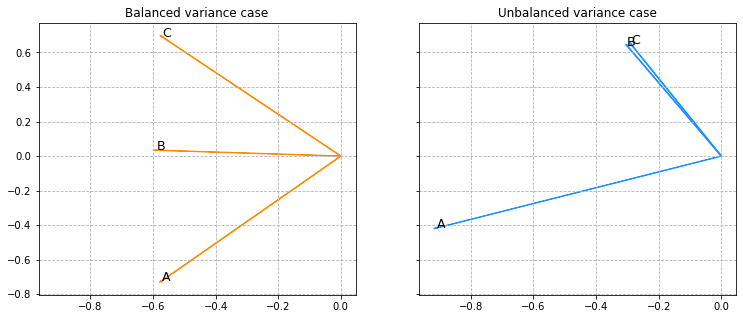

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

n = 1E4
np.random.seed(0)
dWt = np.random.randn(int(n), 3)
Rho = np.array([
    [1, .5, .5],
    [.5, 1, .5],
    [.5, .5, 1]
])
L = np.linalg.cholesky(Rho)

sigma = [np.diag([x, 1, 1]) for x in range(1, 3)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5), sharey=True, sharex=True)
colors = ['darkorange', 'dodgerblue']
for i in range(2):
    S = sigma[i]
    r_t = S @ L @ dWt.T
    u, s, v_t = np.linalg.svd(r_t.T, full_matrices=False, compute_uv=True)
 
    for asset in range(v_t.shape[1]):
        xy = v_t[:2, asset]
        axs[i].arrow(*(0, 0), *xy, color=colors[i], width=0.0025)
        axs[i].annotate(string.ascii_uppercase[asset], xy, fontsize=12.5)
    axs[i].grid(ls='--')

axs[0].set_title('Balanced variance case')
axs[1].set_title('Unbalanced variance case')
plt.show()

## Part 2. Impact of outliers

http://faculty.baruch.cuny.edu/jgatheral/JumpDiffusionModels.pdf

\begin{align}
d S_{1,t} &= \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t} + S_{1, t} d J_{1, t}\\
d S_{2, t} &= \mu_{2} S_{2, t} dt + \sigma_{2} S_{2, t} \rho dW_{t} + \sigma S_{2, t} \sqrt{1 - \rho^{2}} dZ_{t}  + S_{2, t} d J_{2, t}
\end{align}

Points to make:
1. Financial time series are rarely distributed normal (left tail events)
2. Add jump difussion to the exercise above, show the impact of the jumps in the resulting eigenvalues (paint the outliers differently)
3. Is it possible to measure the impact? (even if it's through simulations)

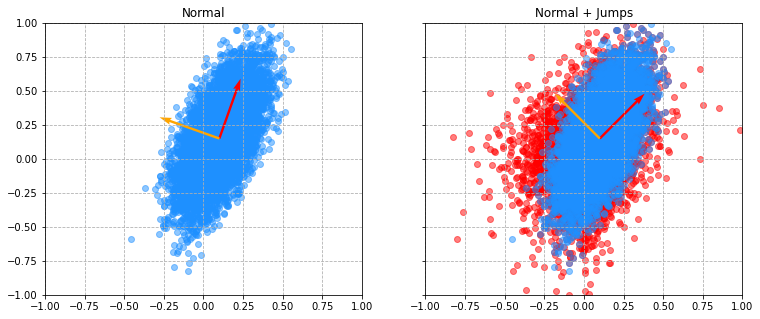

In [2]:
n = 10000
np.random.seed(0)
dWt = np.random.randn(n, 2)
mu = np.array([.1, .15])
sigma = np.array([.125, .25])
rho = .6
r1 = mu[0] + sigma[0] * dWt[:, 0]
r2 = mu[1] + sigma[1] * rho * dWt[:, 0] + sigma[1] * np.sqrt(1 - rho**2) * dWt[:, 1]

np.random.seed(0)
jump_location = np.random.poisson(lam=.25, size=(n, 2))
jump_magnitude = np.random.normal(loc=-.1, scale=.15, size=(n, 2))
dJt = np.multiply(jump_location, jump_magnitude)

r1j = r1 + dJt[:, 0].flatten()
r2j = r2 + dJt[:, 1].flatten()

matrices = {
    'Normal': np.cov(r1, r2), 
    'Normal + Jumps': np.cov(r2j, r2j)
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5), sharey=True, sharex=True)
for i, m in enumerate(matrices):
    L, V = np.linalg.eig(matrices[m])
    order = L.argsort()[::-1]
    L = L[order]
    V = V[:, order]
    flip_sign = np.sign(V[:, 0].sum())
    
    axs[i].set_title(m)
    if i == 1:
        axs[i].scatter(r1j, r2j, color='red', alpha=.5)
    axs[i].scatter(r1, r2, color='dodgerblue', alpha=.5)
    axs[i].set_xlim(-1, 1)
    axs[i].set_ylim(-1, 1)
    axs[i].quiver(*mu, *V[:, 0] * flip_sign, color=['r'], scale=5)
    axs[i].quiver(*mu, *V[:, 1], color=['orange'], scale=5)  # Scale should be proportional to the eigenvalue
    axs[i].grid(ls='--')
plt.show()

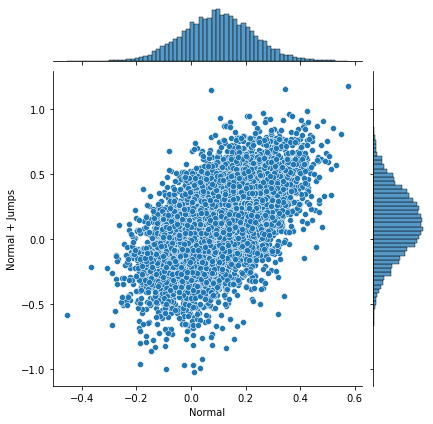

In [3]:
import seaborn as sns

data = pd.DataFrame([r1, r2j], index=['Normal', 'Normal + Jumps']).T
g = sns.jointplot(x=data['Normal'], y=data['Normal + Jumps'])
# g.plot_joint(sns.kdeplot, color="r", zorder=100, levels=10, fill=True, bw=.10)


## Part 3. Robust Principal Component Analysis

The Singular Value Decomposition is highly susceptible to outliers and corrupted data, making it fragile with respect to non-normal disturbances. Candes et al. (2011) developed an approach to robust principal component analysis that allows one to recover the principal components of a data matrix even though a positive fractivon of its entries are arbitrarly corrupted, and even missing, with applications in the area of face recognition.  

The methodology seeks to decompose the data matrix $X$ into a structured low-rank matrix $L$ and a sparse matrix $S$ containing outliers and corrupt data:

\begin{aligned}
M=L_0+S_0
\end{aligned}

The principal components of $L$ are robust to outliers and corrupt data in $S$. Mathematically, the goal is to find $L$ and $S$ that satisfy the following:

\begin{aligned}
\min_{L,S} ||L||_{*} + \lambda ||S||_{1} \\
\text{subject to} \\ L + S = M
\end{aligned}

The authors recommend, for practical problems, to set $\lambda = 1 / \sqrt{\max (N, T)}$ as a good rule of thumb, which can then be adjusted slightly to obtain the best possible result.

From https://www.hindawi.com/journals/acisc/2017/2520301/

For a scalar $\tau$, the shrinkage operator $S_{\tau}(x)$ for $\ell_{1}$ norm minimization problem is defined as follows:

\begin{aligned}
S_{\tau}(X) = \text{sgn}(x)max(|x| - \tau, 0)
\end{aligned}

where sgn is a signum function; $|.|$ calculates the absolute value.

In [23]:
import yfinance as yf
import pandas_datareader.data as web

# ETF prices
meta = pd.read_csv('etfs_comprehensive.csv', index_col=0)
#meta = meta.iloc[:4]
collect = []
for n in meta.index:
    ticker = yf.Ticker(n)
    px = ticker.history(period="max")['Close']
    px.name = n
    collect += [px]

prices = pd.concat(collect, axis=1)

# Risk free rate (Fama-French)
ff = web.DataReader(
    'F-F_Research_Data_Factors_daily', 
    'famafrench',
    start='12/31/1999'
)
rf = ff[0]['RF'] * .01  # Originally expressed in percentage points

# Subtract the risk-free rate
total_return = prices.pct_change().dropna()
excess_return = total_return.sub(rf.reindex(total_return.index, method='ffill'), axis=0)

In [24]:
from rpca import RobustPCA
X = excess_return.sub(excess_return.mean()).div(excess_return.std()).values
n1, n2 = X.shape
lambda_ = 1 / np.sqrt(max(n1, n2)) * 4
rob = RobustPCA(lmb=lambda_, max_iter=int(1E6))
L, S = rob.fit(X)

Original
Noise
Robust


<AxesSubplot:xlabel='Date'>

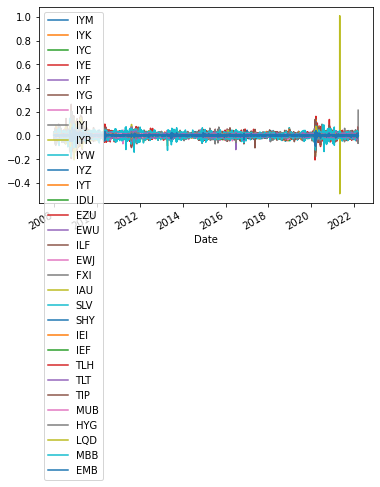

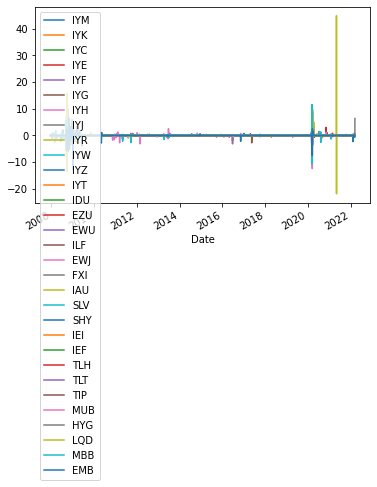

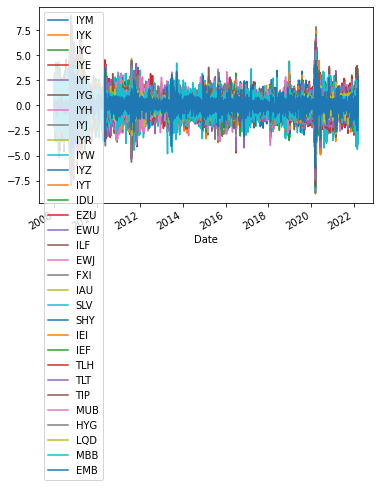

In [25]:
er_robust = pd.DataFrame(L, index=excess_return.index, columns=excess_return.columns)
er_noise = pd.DataFrame(S, index=excess_return.index, columns=excess_return.columns)
print('Original')
excess_return.plot()
print('Noise')
er_noise.plot()
print('Robust')
er_robust.plot()

Optimal truncation (robust):  8
Optimal truncation (raw):  10


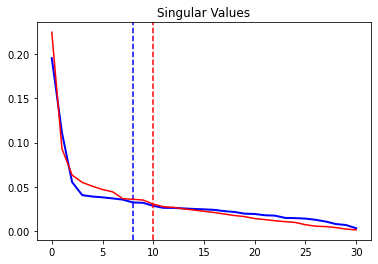

In [27]:
'''
Truncation
----------
Sources:
    - https://arxiv.org/pdf/1305.5870.pdf
    - http://www.pyrunner.com/weblog/2016/08/01/optimal-svht/
    - https://github.com/erichson/optht
'''
from scipy.linalg import svd
from optht import optht

u, s, vh = svd(er_robust, full_matrices=False, compute_uv=True, lapack_driver='gesdd')
pd.Series(s / s.sum()).plot(title='Singular Values', color='blue', lw=2)
k = optht(er_robust.values, sv=s, sigma=None)
print('Optimal truncation (robust): ', k)
plt.gca().axvline(k, color='blue', ls='--')

u, s, vh = svd(excess_return, full_matrices=False, compute_uv=True, lapack_driver='gesdd')
pd.Series(s / s.sum()).plot(title='Singular Values', color='red')
k = optht(excess_return.values, sv=s, sigma=None)
print('Optimal truncation (raw): ', k)
plt.gca().axvline(k, color='red', ls='--')

# The low rank structure of the data becomes more aparaent when the data is cleaned with RPCA

In [ ]:
# M = excess_return.sub(excess_return.mean()).div(excess_return.std())
# M = M.values

# def shrink(X, tau):
#     shrinked_X = np.multiply(np.sign(X), (np.abs(S) - tau).clip(0))
#     return shrinked_X

# def SVT(X, tau):
#     U, S, Vt = np.linalg.svd(X, full_matrices=False, compute_uv=True) 
#     res = U @ shrink(np.diag(S), tau) @ Vt
#     return res

# # RPCA
# X = M.copy()
# n1, n2 = M.shape
# mu = n1 * n2 / (4 * np.abs(M).sum())
# tau = 1 / mu
# lambda_ = 1 / np.sqrt(max(n1, n2))
# thresh = 1E-7 * np.linalg.norm(X, ord='fro')

# L = np.zeros((n1, n2), dtype=float)
# S = np.zeros((n1, n2), dtype=float)
# Y = np.zeros((n1, n2), dtype=float)
# count = 0

# while (np.linalg.norm(X - S - S, 'fro')) > thresh and (count < 1000):
#     L = SVT(X=X - S + (1 / mu) * Y, tau=1 / mu)
#     S = shrink(X - L + (1 / mu), tau=lambda_ / mu)
#     Y = Y + mu * (X - L - S)
#     count = count + 1

## Part 4. Sparse Representation of the Portfolio Risk

Points to make:
1. Noise might also be captured by the last eigenvalues
2. Given the ordered nature of the eigenvalues, main drivers of return are identified in the first N eigenvectors
3. More eigenvectors to equalize (SRP) more computation time 
3. Dropping last eigenvectors should reduce noise in the projection and speed up the computation time

## Part 5. The Eigenvector Sign Issue ($J$)

Points to make:
1. How can I select a $j$ within the $2^{N-1}$ columns of $J$?